https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset?select=credit_card_transactions.csv

In [1]:
# pandas, Numpy
import pandas as pd
import numpy as np

# Import visualization packages "Matplotlib" and "Seaborn". 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import itertools

from ipywidgets import interact, widgets
from dateutil.relativedelta import relativedelta


/Users/samriddhimangal/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Read dataset
df_orig=pd.read_csv("Data/credit_card_transactions.csv")
df=df_orig.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

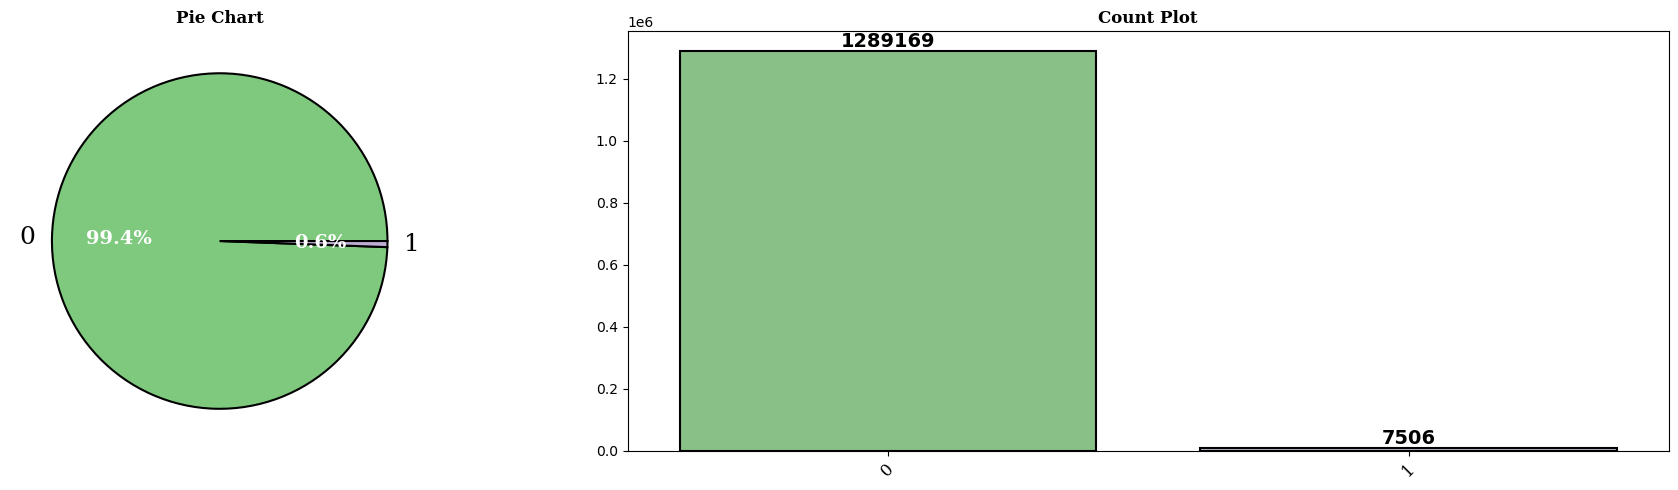

In [4]:
#fraud non fraud distribution

palette = sns.color_palette('Accent', 8)


def plot_chart(col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))


    counts = df['is_fraud'].value_counts()
    wedges, texts, autotexts = ax[0].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        textprops={'fontsize': 18, 'fontfamily': 'serif'},
        shadow=False,
        wedgeprops={'edgecolor': 'black', 'lw': 1.5},
        colors=palette
    )
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
        autotext.set_size(14)
    
    ax[0].set_title( 'Pie Chart', fontweight='bold', fontfamily='serif')          


    sns.countplot(x=col, data=df, ax=ax[1], palette=palette, edgecolor='black', lw=1.5, order=counts.index)
    ax[1].set_title( 'Count Plot', fontweight='bold', fontfamily='serif')
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontfamily='serif', fontsize=12,rotation=45)
    

    for p in ax[1].patches:
        height = p.get_height()
        ax[1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                       ha='center', va='bottom', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
plot_chart(df['is_fraud']) 


In [5]:
#Create Variables and change datatypes
# change Date column to datetime data type
# Also, we can add month and day to see some trends.
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['Month']=df['trans_date_trans_time'].dt.month 
df['Day']=df['trans_date_trans_time'].dt.day_name()
df['dob']=pd.to_datetime(df['dob'], errors='coerce')

In [6]:
#Create time variable
df['Time'] = pd.to_datetime(df['trans_date_trans_time']).dt.time

In [7]:
#Format time variable
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [8]:
#Create hour column
df['Hour'] = df['Time'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 28 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [9]:
#create time of the day groups
def timeofday(hour):
    if 5 <= hour < 12:
        return '05:00 to 11:00 hours'
    elif 12 <= hour < 17:
        return '12:00 to 16:00 hours'
    elif 17 <= hour < 21:
        return '17:00 to 20:00 hours'
    else:
        return '21:00 to 04:00 hours'

In [10]:
df['TimeoftheDay'] = df['Hour'].apply(timeofday)

In [11]:
df['dob'] = pd.to_datetime(df['dob'])

# Function to calculate age
def calculate_age(dob):
    today = datetime.now().date()
    return relativedelta(today, dob).years

# Apply the function to the DOB column
df['Age'] = df['dob'].apply(lambda x: calculate_age(x))

In [12]:
# Time of the day and Fraud and Non Fraud
def fraud(fraud_cat):
    if fraud_cat == 0:
        return 0   
    else:
        return 1
    
def nonfraud(fraud_cat):
    if fraud_cat == 0:
        return 1   
    else:
        return 0
    
df['fraud'] = df['is_fraud'].apply(fraud)
df['nonfraud'] = df['is_fraud'].apply(nonfraud)

In [13]:
# Time of the day and Fraud
sns.set_palette('BuGn')

#  pivot table 
pivot_Fraudcounts = pd.pivot_table(
    df,
    values='fraud',
    index=['TimeoftheDay'],
    aggfunc=np.sum,
    margins=True,
    margins_name='Total',
    fill_value=0
)


total_frauds = pivot_Fraudcounts.loc['Total'].values[0]
pivot_percentage = (pivot_Fraudcounts / total_frauds) * 100


combined_pivot = pd.concat([pivot_Fraudcounts, pivot_percentage], axis=1, keys=['Count', 'Percentage'])


combined_pivot.drop('Total', inplace=True)

# Format the percentage column
combined_pivot[('Percentage', 'fraud')] = combined_pivot[('Percentage', 'fraud')].map("{:.2f}%".format)

# Display the combined pivot table
combined_pivot



,Count,Percentage
,fraud,fraud
TimeoftheDay,,
05:00 to 11:00 hours,334,4.45%
12:00 to 16:00 hours,388,5.17%
17:00 to 20:00 hours,302,4.02%
21:00 to 04:00 hours,6482,86.36%


In [14]:
# Time of the day and nonFraud
sns.set_palette('BuGn')


pivot_Fraudcounts = pd.pivot_table(
    df,
    values='nonfraud',
    index=['TimeoftheDay'],
    aggfunc=np.sum,
    margins=True,
    margins_name='Total',
    fill_value=0
)


total_frauds = pivot_Fraudcounts.loc['Total'].values[0]
pivot_percentage = (pivot_Fraudcounts / total_frauds) * 100


combined_pivot = pd.concat([pivot_Fraudcounts, pivot_percentage], axis=1, keys=['Count', 'Percentage'])


combined_pivot.drop('Total', inplace=True)


combined_pivot[('Percentage', 'nonfraud')] = combined_pivot[('Percentage', 'nonfraud')].map("{:.2f}%".format)

# Display the combined pivot table
combined_pivot


,Count,Percentage
,nonfraud,nonfraud
TimeoftheDay,,
05:00 to 11:00 hours,295383,22.91%
12:00 to 16:00 hours,326185,25.30%
17:00 to 20:00 hours,261805,20.31%
21:00 to 04:00 hours,405796,31.48%


In [15]:
#Display Fraud non Fraud amount
df['FraudAmount'] = df['amt'].where(df['is_fraud'] == 1, 0)
df['NonFraudAmount'] = df['amt'].where(df['is_fraud'] == 0, 0)

In [16]:
df_grouped_sum = df.groupby('TimeoftheDay')[['FraudAmount', 'NonFraudAmount']].sum().reset_index()

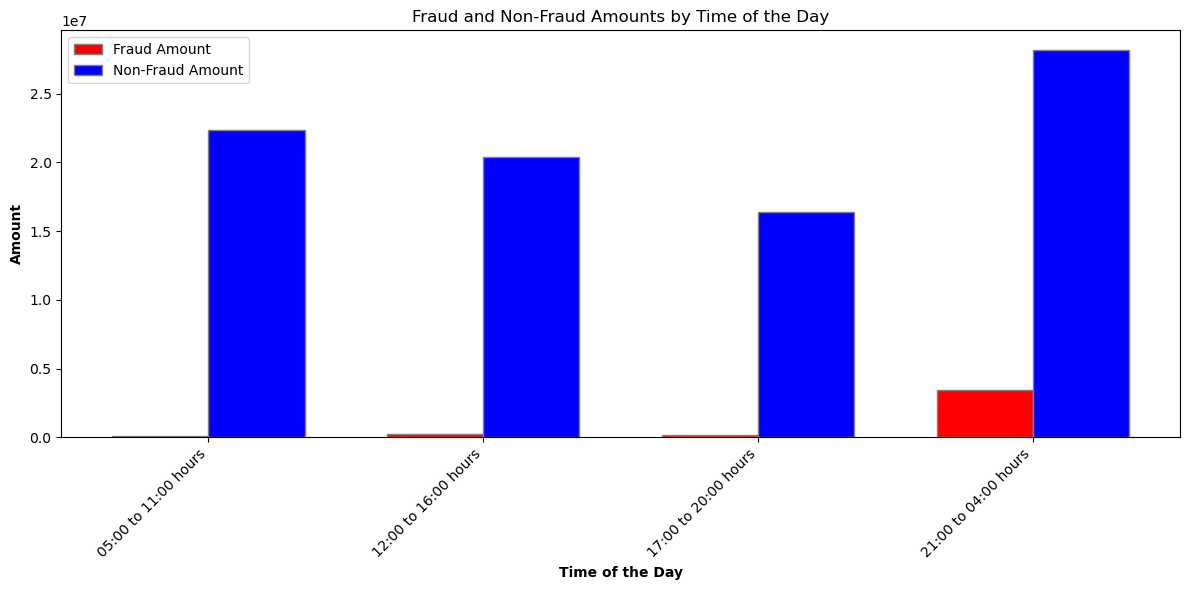

In [17]:

# Set the width of the bars
bar_width = 0.35


r1 = np.arange(len(df_grouped_sum['TimeoftheDay']))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(12, 6))
plt.bar(r1, df_grouped_sum['FraudAmount'], color='red', width=bar_width, edgecolor='grey', label='Fraud Amount')
plt.bar(r2, df_grouped_sum['NonFraudAmount'], color='blue', width=bar_width, edgecolor='grey', label='Non-Fraud Amount')


plt.xlabel('Time of the Day', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(df_grouped_sum['TimeoftheDay']))], df_grouped_sum['TimeoftheDay'], rotation=45, ha='right')


plt.title('Fraud and Non-Fraud Amounts by Time of the Day')
plt.legend()


plt.tight_layout()
plt.show()


In [18]:
#Create Age groups
df['Age_Bins'] = pd.cut(df['Age'], bins=5)
df['Age_Bins'].value_counts(dropna=False)

Age_Bins
(35.0, 51.0]     473372
(51.0, 67.0]     320054
(18.92, 35.0]    276856
(67.0, 83.0]     161009
(83.0, 99.0]      65384
Name: count, dtype: int64

In [19]:
#Age bin by category and amount
product_lines = df['category'].unique().tolist()

sns.set_palette('Accent')
sns.set_style("darkgrid")

def plot_Age_bin(product_line):
    fig, ax = plt.subplots(figsize=(20, 6))
    df1 = df[df["category"] == product_line]
    df_pivot1 = pd.pivot_table(
        df1, 
        values="amt", 
        index="category",
        columns=["Age_Bins"],
        aggfunc=np.sum
    )
    
    pivot = df_pivot1

    pivot.plot.bar(ax=ax, stacked=False, width=0.2) 
    ax.set_ylabel("amt", fontsize=14) 
    ax.set_title(f"Amout spend for {product_line} by different Age groups", fontsize=23)  
    

    ax.set_xticklabels(ax.get_xticklabels(), fontsize=19, rotation=0)
    

    legend = ax.legend(title='Age groups', fontsize=16, title_fontsize=18)  

    for container in ax.containers:
        labels = [f'{int(v):,}' for v in container.datavalues]  
        ax.bar_label(container, labels=labels, label_type='center', fontsize=16)
    
    plt.tight_layout()
    plt.show()


interact(
    plot_Age_bin,
    product_line=widgets.Dropdown(options=product_lines, description='Product Line:')
)



interactive(children=(Dropdown(description='Product Line:', options=('misc_net', 'grocery_pos', 'entertainment…

<function __main__.plot_Age_bin(product_line)>

In [21]:
# time series plot Fraud non Fraud amount


# Convert to datetime 
df['datetime_column'] = pd.to_datetime(df['trans_date_trans_time'])

# get date 
df['date_part'] = df['datetime_column'].dt.date

In [22]:
df_date_sum = df.groupby('date_part')[['FraudAmount', 'NonFraudAmount']].sum().reset_index()

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07')])

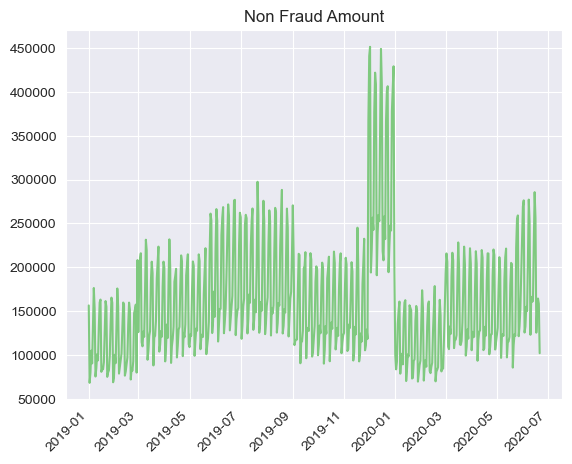

In [23]:
plt.plot(df_date_sum['date_part'],df_date_sum['NonFraudAmount'])
plt.title("Non Fraud Amount")
plt.xticks(rotation=45, ha='right')

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07')])

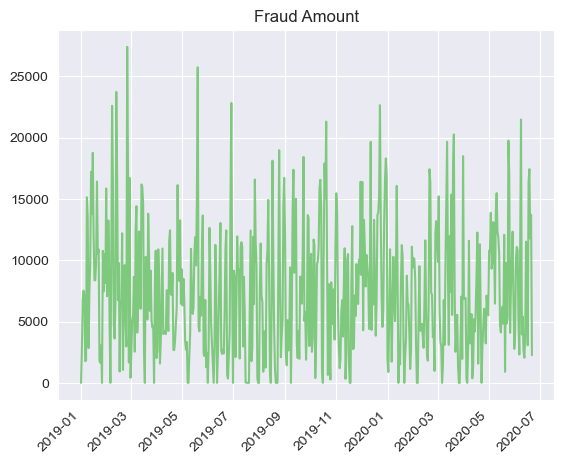

In [24]:
plt.plot(df_date_sum['date_part'],df_date_sum['FraudAmount'])
plt.title("Fraud Amount")
plt.xticks(rotation=45, ha='right')

(array([17897., 17956., 18017., 18078., 18140., 18201., 18262., 18322.,
        18383., 18444.]),
 [Text(17897.0, 0, '2019-01'),
  Text(17956.0, 0, '2019-03'),
  Text(18017.0, 0, '2019-05'),
  Text(18078.0, 0, '2019-07'),
  Text(18140.0, 0, '2019-09'),
  Text(18201.0, 0, '2019-11'),
  Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07')])

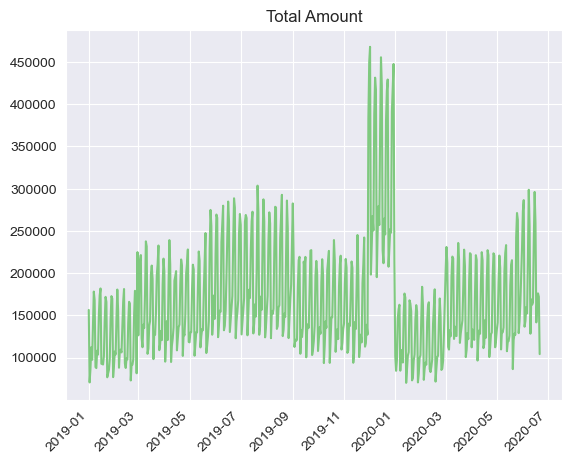

In [25]:
df_date_sum['Total Amount']=df_date_sum['FraudAmount']+ df_date_sum['NonFraudAmount']
    
plt.plot(df_date_sum['date_part'],df_date_sum['Total Amount'])
plt.title("Total Amount")
plt.xticks(rotation=45, ha='right')

In [26]:
#fraud non fraud distribution
numerical=['FraudAmount','NonFraudAmount']
def plot_distribution(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle("Distribution of Fraud/Non Fraud Amount", fontsize=16, fontweight='bold')

    counts, bins, patches = ax1.hist(df_date_sum[column].dropna(), bins=25, edgecolor='black')
    ax1.set_xlabel(column, fontsize=14)
    ax1.set_ylabel("Counts", fontsize=14)

    for count, patch in zip(counts, patches):
        height = patch.get_height()
        ax1.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    ax2.boxplot(df_date_sum[column].dropna(), vert=False)
    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel("", fontsize=14)

    median = np.median(df_date_sum[column].dropna())
    q1 = np.percentile(df_date_sum[column].dropna(), 25)
    q3 = np.percentile(df_date_sum[column].dropna(), 75)

    ax2.annotate(f'Median: {median:.2f}', xy=(median, 1), xytext=(0, -28), 
                 textcoords='offset points', ha='center', va='center', color='red', fontsize=12)
    ax2.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='blue', fontsize=12)
    ax2.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='green', fontsize=12)

    
    plt.tight_layout()
    plt.show()


interact(plot_distribution, column=widgets.Dropdown(options=numerical, description='Numeric:'))

interactive(children=(Dropdown(description='Numeric:', options=('FraudAmount', 'NonFraudAmount'), value='Fraud…

<function __main__.plot_distribution(column)>